In [3]:
import pandas as pd

# Replace 'imports-85.csv' with the actual file path if it's not in the current directory
dataset_url = "https://raw.githubusercontent.com/plotly/datasets/master/imports-85.csv"

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(dataset_url)

# Now, you can work with the 'df' DataFrame as needed
pd.set_option('display.max_columns', None)  # Show all columns
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,5,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,5,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [4]:
target_variable_column = df[['city-mpg']]
feature_columns = df[['curb-weight', 'engine-size']]
# Convert selected columns to a NumPy array
y = target_variable_column.values
X = feature_columns.values

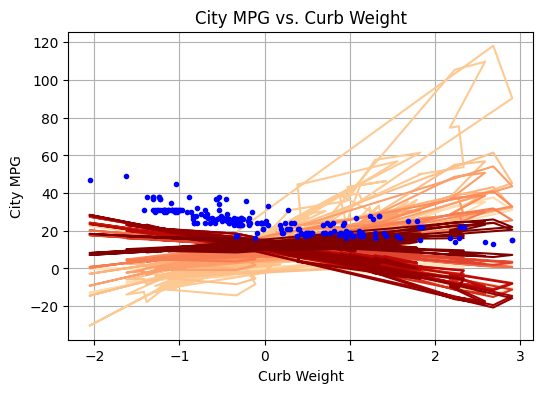

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Add a column of ones to X to represent the bias term
X_b = np.c_[np.ones((X_normalized.shape[0], 1)), X_normalized]

# Define L2 regularization strength (lambda)
lmbda = 1

# Define the number of epochs and learning schedule hyperparameters
n_epochs = 50
t0, t1 = 5, 50

# Define the learning schedule
def learning_schedule(t):
    return t0 / (t + t1)

# Seed for reproducibility
np.random.seed(42)

# Random initialization of parameters
theta = np.random.randn(X_b.shape[1], 1)

# Extra code – for visualization
n_shown = 20
plt.figure(figsize=(6, 4))

# Lists to store the path of parameter values during training
theta_path_sgd = []

# Training loop
for epoch in range(n_epochs):
    for iteration in range(X_b.shape[0]):

        # Extra code – for visualization
        if epoch == 0 and iteration < n_shown:
            y_predict = X_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_normalized[:, 0], y_predict, color=color)

        # Randomly select a data point
        random_index = np.random.randint(X_b.shape[0])
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]

        # Calculate gradients with L2 regularization
        gradients = 2 * xi.T @ (xi @ theta - yi) + 2 * lmbda * theta

        # Update learning rate using the learning schedule
        eta = learning_schedule(epoch * X_b.shape[0] + iteration)

        # Update parameters
        theta = theta - eta * gradients

        # Append the updated parameters to the path
        theta_path_sgd.append(theta)

# Extra code – for visualization
plt.title("City MPG vs. Curb Weight")
plt.xlabel("Curb Weight")
plt.ylabel("City MPG")
plt.plot(X_normalized[:, 0], y, "b.")
#plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()


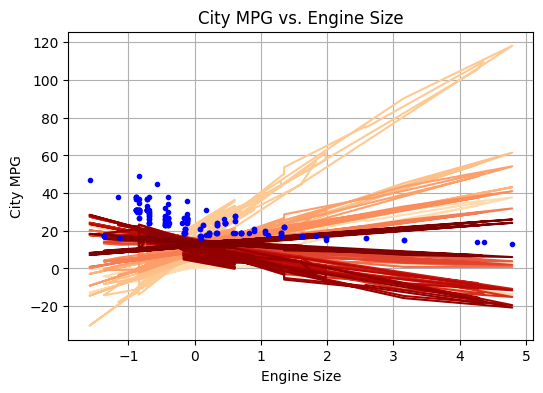

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Add a column of ones to X to represent the bias term
X_b = np.c_[np.ones((X_normalized.shape[0], 1)), X_normalized]

# Define L2 regularization strength (lambda)
lmbda = 1

# Define the number of epochs and learning schedule hyperparameters
n_epochs = 50
t0, t1 = 5, 50

# Define the learning schedule
def learning_schedule(t):
    return t0 / (t + t1)

# Seed for reproducibility
np.random.seed(42)

# Random initialization of parameters
theta = np.random.randn(X_b.shape[1], 1)

# Extra code – for visualization
n_shown = 20
plt.figure(figsize=(6, 4))

# Lists to store the path of parameter values during training
theta_path_sgd = []

# Training loop
for epoch in range(n_epochs):
    for iteration in range(X_b.shape[0]):

        # Extra code – for visualization
        if epoch == 0 and iteration < n_shown:
            y_predict = X_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_normalized[:, 1], y_predict, color=color)

        # Randomly select a data point
        random_index = np.random.randint(X_b.shape[0])
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]

        # Calculate gradients with L2 regularization
        gradients = 2 * xi.T @ (xi @ theta - yi) + 2 * lmbda * theta

        # Update learning rate using the learning schedule
        eta = learning_schedule(epoch * X_b.shape[0] + iteration)

        # Update parameters
        theta = theta - eta * gradients

        # Append the updated parameters to the path
        theta_path_sgd.append(theta)

# Extra code – for visualization
plt.title("City MPG vs. Engine Size")
plt.xlabel("Engine Size")
plt.ylabel("City MPG")
plt.plot(X_normalized[:, 1], y, "b.")
#plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()
